In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
city_day=pd.read_csv('city_day.csv')
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [64]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [65]:
city_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [66]:
print("Start Date",city_day['Date'].min(),"End Date",city_day['Date'].max())

Start Date 2015-01-01 End Date 2020-07-01


In [67]:
city_day.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

[nan 'Poor' 'Very Poor' 'Severe' 'Moderate' 'Satisfactory' 'Good']


City              0
Date              0
PM2.5           678
PM10           7086
NO              387
NO2             391
NOx            1857
NH3            6536
CO              445
SO2             605
O3              807
Benzene        3535
Toluene        5826
Xylene        15372
AQI               0
AQI_Bucket        0
dtype: int64

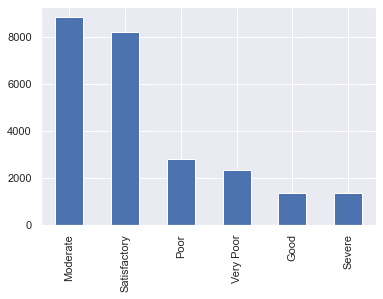

In [68]:
#unique values in AQI_Bucket column
print(city_day['AQI_Bucket'].unique())
city_day["AQI_Bucket"].value_counts()
city_day["AQI_Bucket"].value_counts().plot(kind='bar')
#remove nan from AQI_Bucket column
city_day=city_day.dropna(subset=['AQI_Bucket'])
city_day.isnull().sum()

In [69]:
#New column AQI_Bucket_ordinal with AQI_Bucket values converted to ordinal values
mapper={"Severe":1,"Very Poor":2,"Poor":3,"Moderate":4,"Satisfactory":5,"Good":6}
city_day['AQI_Bucket_ordinal']=city_day['AQI_Bucket'].replace(mapper)
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,AQI_Bucket_ordinal
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor,3
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor,2
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe,1
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe,1
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe,1


In [70]:
city_day.isnull().sum()

City                      0
Date                      0
PM2.5                   678
PM10                   7086
NO                      387
NO2                     391
NOx                    1857
NH3                    6536
CO                      445
SO2                     605
O3                      807
Benzene                3535
Toluene                5826
Xylene                15372
AQI                       0
AQI_Bucket                0
AQI_Bucket_ordinal        0
dtype: int64

In [71]:
city_day['PM2.5']=city_day['PM2.5'].fillna(city_day['PM2.5'].mean())
city_day['PM10']=city_day['PM10'].fillna(city_day['PM10'].mean())
city_day['NO']=city_day['NO'].fillna(city_day['NO'].mean())
city_day['NO2']=city_day['NO2'].fillna(city_day['NO2'].mean())
city_day['NOx']=city_day['NOx'].fillna(city_day['NOx'].mean())
city_day['NH3']=city_day['NH3'].fillna(city_day['NH3'].mean())
city_day['CO']=city_day['CO'].fillna(city_day['CO'].mean())
city_day['SO2']=city_day['SO2'].fillna(city_day['SO2'].mean())
city_day['O3']=city_day['O3'].fillna(city_day['O3'].mean())
city_day['Benzene']=city_day['Benzene'].fillna(city_day['Benzene'].mean())
city_day['Toluene']=city_day['Toluene'].fillna(city_day['Toluene'].mean())
city_day['Xylene']=city_day['Xylene'].fillna(city_day['Xylene'].mean())
city_day.isnull().sum()

City                  0
Date                  0
PM2.5                 0
PM10                  0
NO                    0
NO2                   0
NOx                   0
NH3                   0
CO                    0
SO2                   0
O3                    0
Benzene               0
Toluene               0
Xylene                0
AQI                   0
AQI_Bucket            0
AQI_Bucket_ordinal    0
dtype: int64

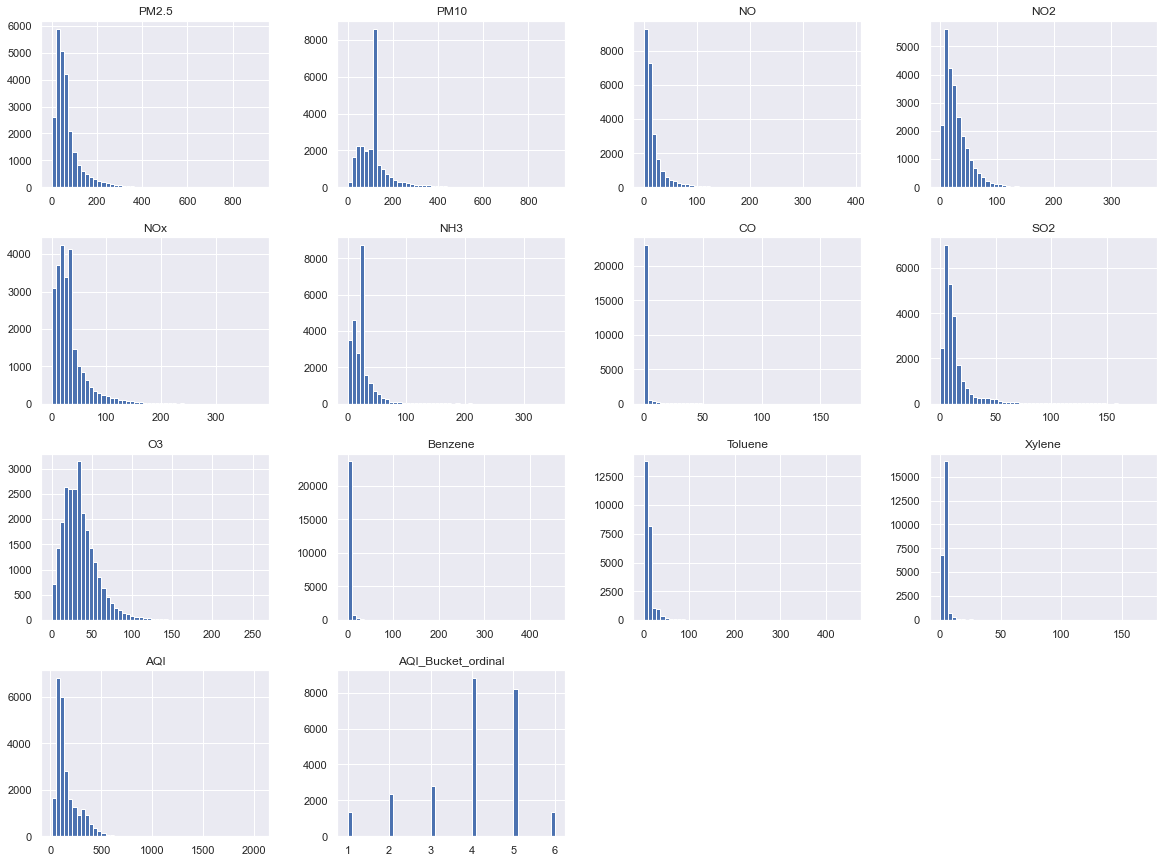

In [72]:
#checking for outliers
city_day.hist(bins=50,figsize=(20,15))
plt.show()

In [73]:
city_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket_ordinal
count,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000
mean,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,3.588683,166.463581,3.977344
std,62.208948,75.660357,22.245859,24.432532,29.542967,22.213762,7.011570,17.215217,21.368849,14.851646,18.269981,4.171218,140.696585,1.232487
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,1.000000
25%,29.560000,71.780000,5.720000,12.090000,14.030000,11.280000,0.590000,5.790000,19.640000,0.340000,1.580000,2.650000,81.000000,3.000000
50%,50.165000,118.454435,10.075000,22.535000,25.720000,23.848366,0.950000,9.430000,32.060000,1.810000,6.790000,3.588683,118.000000,4.000000
75%,79.507500,122.957500,19.710000,37.910000,38.170000,24.710000,1.530000,14.890000,45.397500,3.458668,9.525714,3.588683,208.000000,5.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000,6.000000


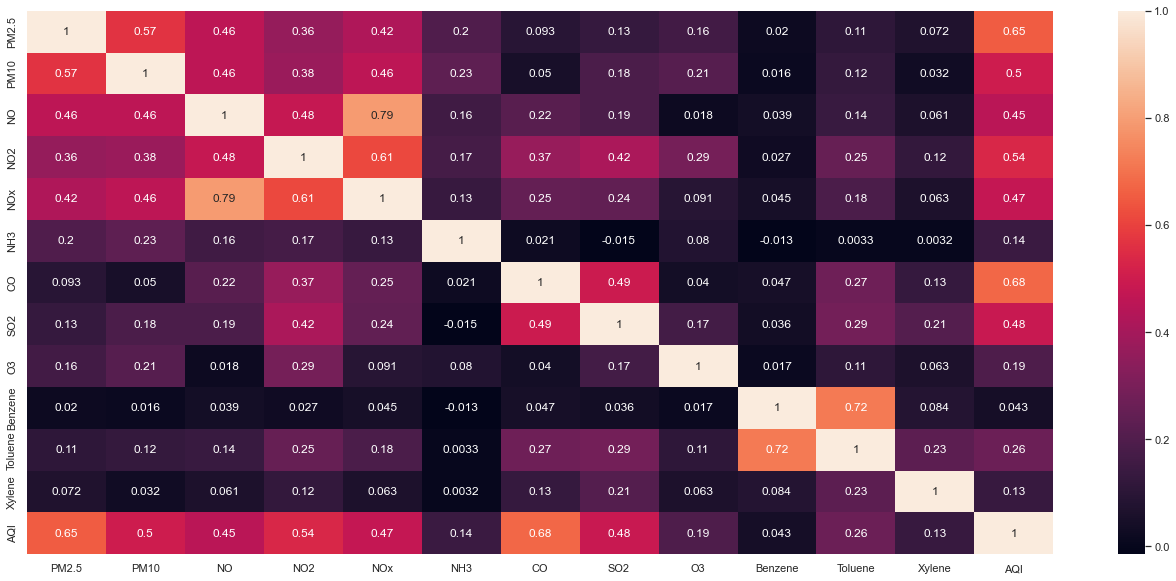

In [74]:
#heatmap
corr=city_day.iloc[:,:-1].corr()
plt.figure(figsize=(23,10))
sns.heatmap(corr,annot=True)
plt.show()

In [75]:
#extract columns with correlation greater than 0.5
corr_matrix=corr.abs()
corr_matrix=corr_matrix[corr_matrix>0.5]
corr_matrix=corr_matrix.dropna(axis=0,how='all')
corr_matrix=corr_matrix.dropna(axis=1,how='all')
corr_matrix.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.567202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.654740
PM10,0.567202,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NO,NaN,NaN,1.000000,NaN,0.790176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NO2,NaN,NaN,NaN,1.000000,0.613517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.535274
NOx,NaN,NaN,0.790176,0.613517,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


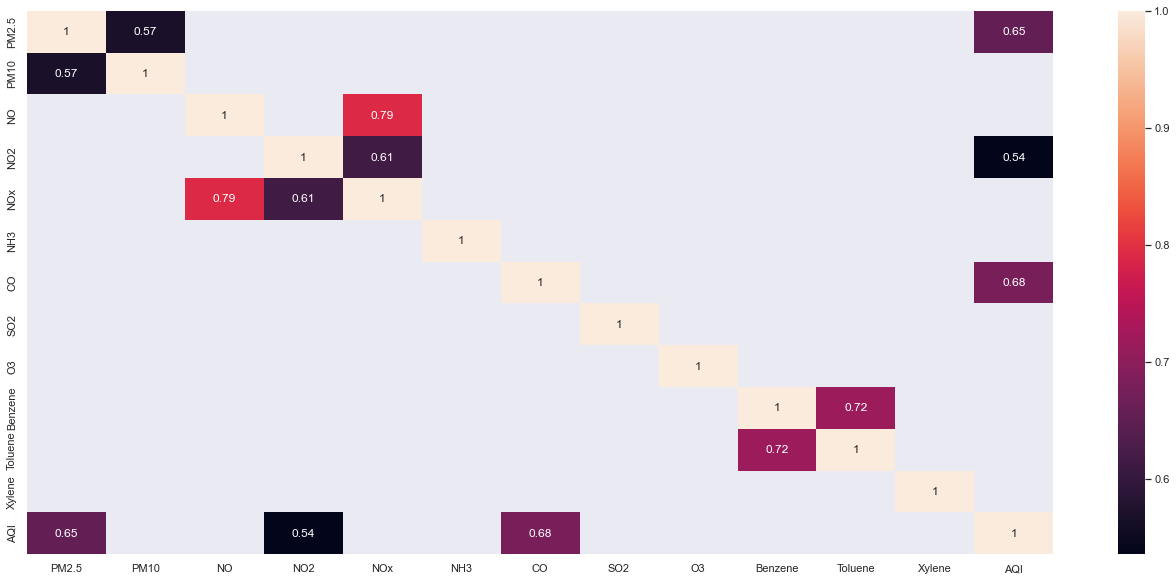

In [76]:
plt.figure(figsize=(23,10))
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [77]:

city_day['City'].unique()
#one hot encoding City column
city_day=pd.get_dummies(city_day,columns=['City'],drop_first=True)
city_day.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
28,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,...,0,0,0,0,0,0,0,0,0,0
29,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,...,0,0,0,0,0,0,0,0,0,0
30,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,...,0,0,0,0,0,0,0,0,0,0
31,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,...,0,0,0,0,0,0,0,0,0,0
32,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,...,0,0,0,0,0,0,0,0,0,0


In [78]:
city_day.columns
x=city_day.drop(['Date','AQI_Bucket','AQI_Bucket_ordinal','AQI'],axis=1)
y=city_day['AQI']

In [79]:
x

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
28,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.020000,...,0,0,0,0,0,0,0,0,0,0
29,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.040000,...,0,0,0,0,0,0,0,0,0,0
30,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.240000,...,0,0,0,0,0,0,0,0,0,0
31,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.400000,...,0,0,0,0,0,0,0,0,0,0
32,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.460000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,...,0,0,0,0,0,0,0,0,0,1
29527,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,...,0,0,0,0,0,0,0,0,0,1
29528,22.91,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,...,0,0,0,0,0,0,0,0,0,1
29529,16.64,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [80]:
#split data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [81]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [83]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train_scaled, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test_scaled, y_test))

167.0685613682093
[ 6.27295240e+01  2.38474935e+01 -2.90998501e+00  5.72599305e+00
  5.52512798e+00 -1.79948729e+00  7.49179044e+01  7.78610166e+00
  5.00465498e+00  2.14002154e+00 -3.00316770e+00 -6.34273226e-02
 -4.15021916e+00 -1.03743641e+01 -1.20597876e+01 -1.79573358e+01
 -5.71028615e+00 -7.53147964e+00 -5.90458511e+00 -1.45413021e+01
 -7.19156285e+00 -1.22021151e+01 -3.12369579e+00 -8.15375478e+00
 -6.52167412e+00 -1.45875746e+01 -1.17973839e+01 -9.81381710e+00
 -3.08372219e+00 -1.00289126e+01 -8.33845731e+00 -1.03789832e+01
 -7.10657729e+00 -5.08811952e+00 -7.18015277e+00 -1.11357381e+01
 -1.31371538e+01]
0.8388625591250201


In [84]:
y_pred=Lin_reg.predict(x_test_scaled)

In [85]:
print("R^2 Score -> "+str(metrics.r2_score(y_test,y_pred))
        +"\nMean Squared Error -> "+str(metrics.mean_squared_error(y_test,y_pred))
        +"\nMean Absolute Error -> "+str(metrics.mean_absolute_error(y_test,y_pred)))

R^2 Score -> 0.8388625591250201
Mean Squared Error -> 3165.6235367330974
Mean Absolute Error -> 29.63154579027776


Text(0.5, 1.0, 'Actual VS Predicted(MLR)')

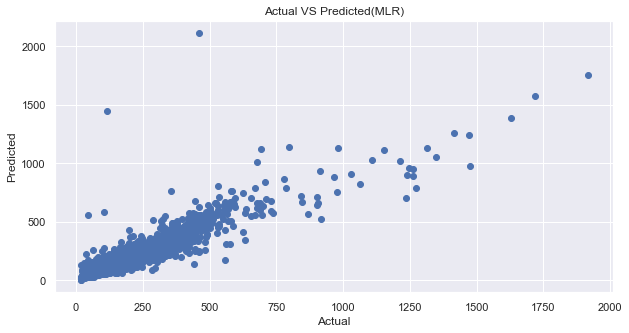

In [86]:
#visualising results
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted(MLR)')

In [87]:
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train_scaled)
poly_reg.fit(x_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_train)

LinearRegression()

In [88]:
y_pred_poly=lin_reg_2.predict(poly_reg.fit_transform(x_test_scaled))

In [89]:
print("R^2 Score -> "+str(metrics.r2_score(y_test,y_pred_poly))
        +"\nMean Squared Error -> "+str(metrics.mean_squared_error(y_test,y_pred_poly))
        +"\nMean Absolute Error -> "+str(metrics.mean_absolute_error(y_test,y_pred_poly)))

R^2 Score -> 0.8859934369838599
Mean Squared Error -> 2239.7144776920422
Mean Absolute Error -> 24.25285908873652


Text(0.5, 1.0, 'Actual VS Predicted(PLR)')

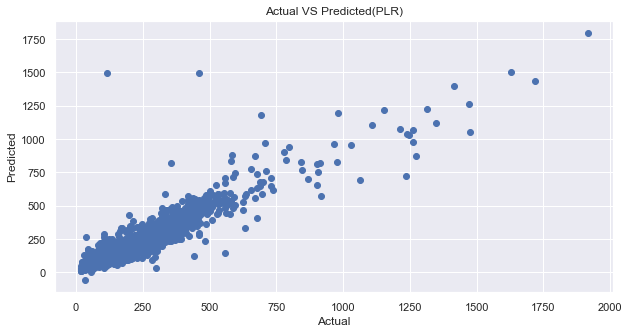

In [90]:
#visualising results
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_poly)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted(PLR)')

Text(0.5, 1.0, 'Predicted_MLR VS Predicted_PLR')

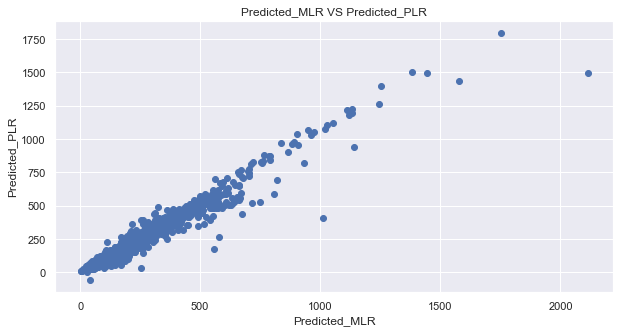

In [92]:
#visualising results
plt.figure(figsize=(10,5))
plt.scatter(y_pred,y_pred_poly)
plt.xlabel('Predicted_MLR')
plt.ylabel('Predicted_PLR')
plt.title('Predicted_MLR VS Predicted_PLR')